In [66]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Handling

In [67]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [68]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [69]:
dataset.shape

(10000, 14)

We have '1000' rows and '14' columns.

In [70]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [71]:
# Independent and dependent features
# 'Exited' is a dependent feature and all others are the independent features
# We don't need 'RowNumber', 'CustomerId' And 'Surname'

X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13] # Only using "Exited"

**Feature Enginnering**

In [72]:
X['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

We have 'France', 'Spain', 'Germany' in Geography column.

In [73]:
X['Gender'].unique()

array(['Female', 'Male'], dtype=object)

We have 'Female', 'Male' in Gender column.

In [74]:
geography = pd.get_dummies(X['Geography'], drop_first=True, dtype = int)
gender = pd.get_dummies(X['Gender'], drop_first=True, dtype = int)

Here, To Aviod mulicolinearity problem in one hot encoding, we are dropping **"France"**. By using Germany and Spain value, our model can easily find out the other value we are looking for is France.

For Example::
- If Germany = 1 and Spain = 0, the
model interprets it as Germany.
- If Germany = 0 and Spain = 1, it interprets it as Spain.
- If Germany = 0 and Spain = 0, it interprets it as France.

Same goes for the gender as well..

In [75]:
geography.head()

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1


In [76]:
X.drop(['Geography', 'Gender'],axis = 1 , inplace = True)

In [77]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [78]:
# Concatenating both geography and gender,
X = pd.concat([X, geography, gender], axis =1)

In [79]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


**Splitting Dataset into train and test set**

In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

**FEATURE SCALING**

In [81]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [82]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

## ANN

In [83]:
# Importing Libraries for ANN model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout



1.   **Sequential**: There will be huge interconnected neural network. If we take the entire network with forward and backward propagation.
2.   **Dense**: With the help of dense, we will be able create input layers, hidden layer and output layers.
3. **Dropout**: Randomly drops the neurons from the hidden layer to prevent overfitting.


In [84]:
# Initialize the ANN

classifier = Sequential()

In [85]:
# Adding Input Layer

classifier.add(Dense(units = 11, activation = 'relu'))

In [86]:
# Adding 1st Hidden Layer

classifier.add(Dense(units = 7, activation = 'relu'))
classifier.add(Dropout(0.2))

In [87]:
# Adding 2nd Hidden Layer

classifier.add(Dense(units = 6, activation = 'relu'))

In [88]:
# Adding Output Layer

classifier.add(Dense(units = 1 , activation = 'sigmoid'))

In [89]:
# giving our own optimizer with its own learning rate
import tensorflow as tf
opt = tf.keras.optimizers.Adam(learning_rate = 0.01)

In [90]:

classifier.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])
#classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Adam optimizer uses its own built in learning rate as 0.01 .


In [91]:
# Early Stopping
# Here it will check for the val_loss

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [92]:
model_history = classifier.fit(X_train, y_train, validation_split = 0.33, batch_size = 10, epochs = 1000, callbacks = early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7715 - loss: 0.4983 - val_accuracy: 0.8213 - val_loss: 0.4083
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8380 - loss: 0.3850 - val_accuracy: 0.8285 - val_loss: 0.3843
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8447 - loss: 0.3764 - val_accuracy: 0.8413 - val_loss: 0.3753
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8608 - loss: 0.3449 - val_accuracy: 0.8410 - val_loss: 0.3801
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8470 - loss: 0.3680 - val_accuracy: 0.8387 - val_loss: 0.3727
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8581 - loss: 0.3548 - val_accuracy: 0.8508 - val_loss: 0.3763
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8503 - loss: 0.3593 - val_accuracy: 0.8243 - val_loss: 0.4027
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8571 - loss: 0.3537 - 

In [93]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

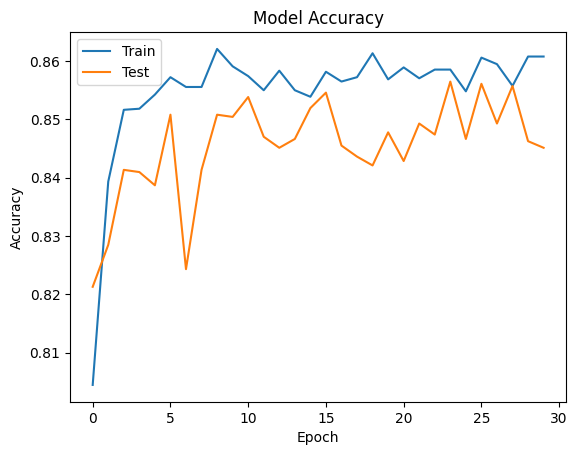

In [94]:
# plotting. the history for the accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show()

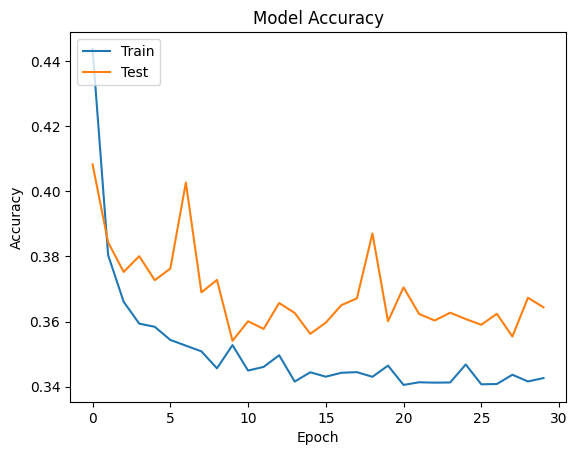

In [95]:
# plotting. the history for the accuracy
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show()

## Prediction

In [96]:
# predict the test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [97]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1557,   38],
       [ 235,  170]])

In [98]:
# Accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
score

0.8635

In [99]:
# Weight on the neural network
# classifier.get_weights()